In [2]:
!pip install Pillow

    100% |████████████████████████████████| 2.0MB 1.3MB/s ta 0:00:011
You are using pip version 18.0, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
%matplotlib inline
import tensorflow as tf
from matplotlib.image import imread 
import matplotlib.pyplot as plt

import os
import glob
import zipfile
import functools

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.grid'] = False
mpl.rcParams['figure.figsize'] = (12,12)

from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import pandas as pd
from PIL import Image

import tensorflow as tf
import tensorflow.contrib as tfcontrib
from tensorflow.python.keras import layers
from tensorflow.python.keras import losses
from tensorflow.python.keras import models
from tensorflow.python.keras import backend as K

In [6]:
print(tf.__version__)

1.10.0


In [3]:
img_str = tf.read_file("/Datasets/5k-palms/40k-jpg/Hand_0011744.jpg.0.jpg")
img = tf.image.decode_jpeg(img_str, channels=3)
img = tf.Print(img, [tf.shape(img)], message="img: ")

img = tf.image.rgb_to_grayscale(img)
img = tf.Print(img, [tf.shape(img)], message="img-gray: ")

sess = tf.Session() 
sess.run(tf.global_variables_initializer())
res = sess.run(img)

print("see the server console: 600/800/3")  

see the server console: 600/800/3


In [7]:
img_str = tf.read_file("/Datasets/5k-palms/40k-masks-mono/Hand_0011744.jpg.0.png")
img = tf.image.decode_png(img_str, channels=1)
img = tf.Print(img, [tf.shape(img)], message="img: ")

sess = tf.Session() 
sess.run(tf.global_variables_initializer())
res = sess.run(img)

print("see the server console: 600/800/1")

see the server console


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


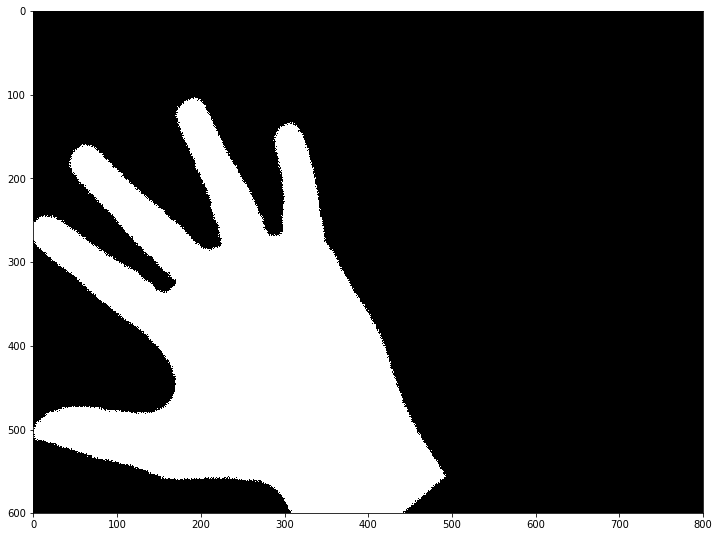

In [15]:
img_file = "/Datasets/5k-palms/40k-jpg/Hand_0011744.jpg.0.jpg"
mask_file = "/Datasets/5k-palms/40k-masks-mono/Hand_0011744.jpg.0.png"

# Loading test image from the local filesystem 
x = tf.Variable(imread(img_file),dtype="float32")
x = tf.Print(x, [tf.shape(x)], message="x: ")

x_mask = tf.Variable(imread(mask_file),dtype='float32')
x_mask = tf.Print(x_mask, [tf.shape(x_mask)], message="x_mask: ")

x_mask = tf.expand_dims(x_mask, axis=-1)  # 600x800 -> 600x800x1 
x_mask = tf.Print(x_mask, [tf.shape(x_mask)], message="x_mask: ")

img_mult = tf.multiply(x,x_mask)

# plt.imshow(imread(img_file))
# plt.show()
# plt.imshow(imread(mask_file))
# plt.show()

sess = tf.Session() 
sess.run(tf.global_variables_initializer())
res = sess.run(img_mult)

plt.imshow(res)
plt.show()